In [1]:
import pandas as pd
import numpy as np
from rich import print
from SyntheticControlMethods import Synth

from covid19_drdfm.covid19 import get_df

## Demo Example


In [2]:
# Import data
data_dir = "https://raw.githubusercontent.com/OscarEngelbrektson/SyntheticControlMethods/master/examples/datasets/"
df = pd.read_csv(data_dir + "smoking_data" + ".csv")
df.head()

,state,year,cigsale,lnincome,beer,age15to24,retprice
0,Alabama,1970.0,89.8,NaN,NaN,0.178862,39.6
1,Alabama,1971.0,95.4,NaN,NaN,0.179928,42.7
2,Alabama,1972.0,101.1,9.498476,NaN,0.180994,42.3
3,Alabama,1973.0,102.9,9.550107,NaN,0.182060,42.1
4,Alabama,1974.0,108.2,9.537163,NaN,0.183126,43.1


In [3]:
df.dtypes

state         object
year         float64
cigsale      float64
lnincome     float64
beer         float64
age15to24    float64
retprice     float64
dtype: object

Running model


In [4]:
df = df.rename(columns={"cigsale": "Pandemic"})
sc = Synth(df, "Pandemic", "state", "year", 1989, "California", n_optim=10, pen="auto")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.20995D+04    |proj g|=  2.00000D+01

At iterate    3    f=  1.36783D+02    |proj g|=  1.81324D+01

At iterate    6    f=  1.35389D+02    |proj g|=  1.94035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      9     11     0     0   1.940D-02   1.354D+02
  F =   135.38891275424271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7    116     18     0     6   6.490D+00   2.197D+03
  F =   2197.1176416593821     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44723D+03    |proj g|=  1.53292D+01

At iterate    3    f=  5.05580D+02    |proj g|=  6.73321D+00

At iterate    6    f=  3.29502D+02    |proj g|=  1.32355D+01

At iterate    9    f=  3.25170D+02    |proj g|=  5.47402D-03

       

In [5]:
sc.original_data.weight_df

,Weight
New Hampshire,0.253153
Utah,0.746847


In [6]:
sc.original_data.comparison_df

,California,Synthetic California,WMAPE,Importance
Pandemic,116.21,116.07,66.67,0.22
lnincome,10.03,9.72,0.31,0.22
beer,24.28,18.81,10.87,0.22
age15to24,0.18,0.19,0.01,0.22
retprice,66.64,63.38,3.25,0.14


In [7]:
print(f"PEN: {sc.original_data.pen}")

PEN: 1.8763149147474656

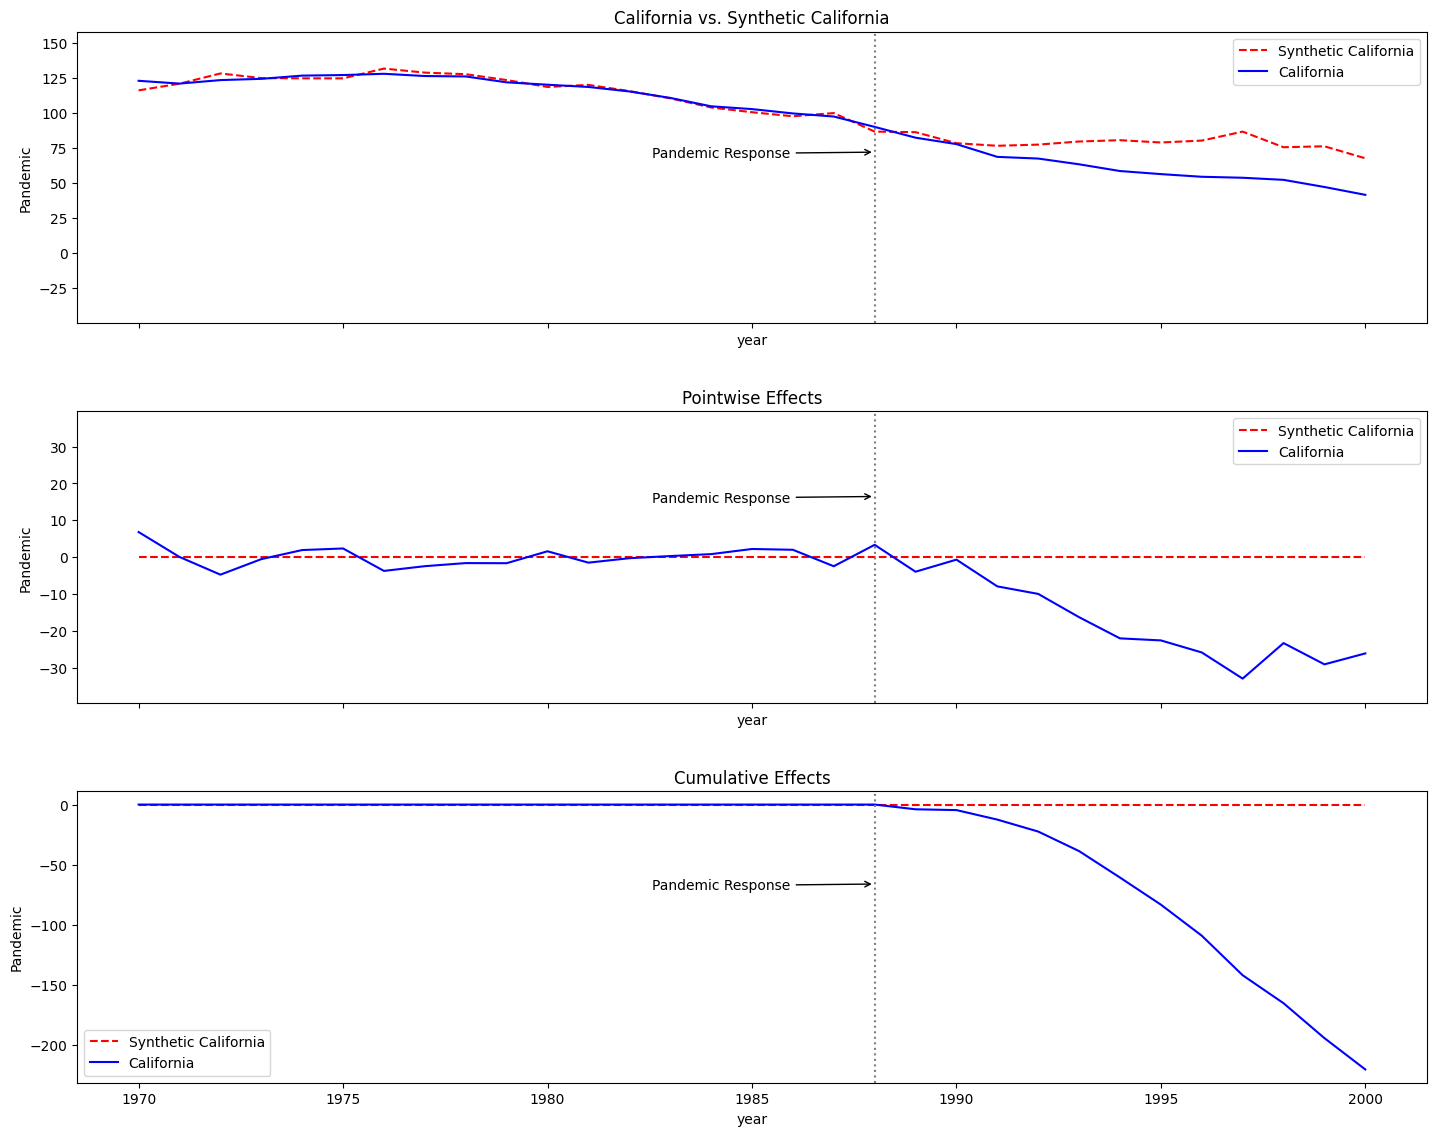

In [8]:
sc.plot(
    ["original", "pointwise", "cumulative"],
    treated_label="California",
    synth_label="Synthetic California",
    treatment_label="Pandemic Response",
)

## Test Example Covid-19 Data

> Run a small subset of the data to test SCM

"Minimal test set"

> Aaron — Yesterday at 8:54 PM
> Simple example: Use a single state as the treated unit, the other 49 as the pool of potential comparisons. Use the entire time frame. Choose Feb 2020 as the treatment time. Outcome variable will be the factor Pandemic (dont care what run). Predictor variables will be Consumption 1-4.

1. Single State as **Treated Unit**
2. Use entire timeframe
3. Feb 2020 as **Treatment Time**
4. **Outcome variable** will be `Pandemic`
5. **Predictor variables** will be `Consumption {1..4}`

I created a run with the following Factor/Variable parameters:

1. **Pandemic** - Cases1/4, Deaths2/4
2. **Consumption** - Cons1/2/3/4
3. **Inflation** - CPIU, PCE
4. **Employment** - Employment1/2
5. **Uncat** - Tbill1yr/10yr

- **Global multiplier**: 1
- All 50 states
- State Date: `2012/01/01`


Read in Raw Data


In [9]:
# | label: tbl-raw
# | tbl-cap: Preprocessed Covid-19 data. Used as input to Dynamic Factor Model
variables = [
    "Cases1",
    "Cases4",
    "Deaths2",
    "Deaths4",
    "CPIU",
    "PCE",
    "Employment1",
    "Employment2",
    "TBill1yr",
    "TBill10yr",
]
factors = ["Pandemic", "Consumption", "Inflation", "Employment", "Uncat"]
fac_labels = [f"Factor_{x}" for x in factors]
df = get_df().set_index(["Time", "State"])
df

,,GDP,UI,Cons1,Cons3,Cons4,Cons5,Cons2,Employment1,Employment2,CPIU,...,School,Mask2,CPI,FFR,Cases4,Cases1,Hosp2,Hosp1,Deaths4,Deaths1
Time,State,,,,,,,,,,,,,,,,,,,,,
2012-01-01,AK,59188.506187,16588.0,30243.305512,3050.166292,6277.104330,20916.034890,9327.270622,141584,133246,100.000000,...,NaN,0,100.000000,0.08,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,AK,58911.647998,16498.0,30267.232575,3054.732366,6271.150401,20941.349808,9325.882767,141858,133518,100.213745,...,NaN,0,100.219491,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,AK,58654.835314,15407.0,30300.772046,3060.259688,6267.233168,20973.279190,9327.492856,142036,133744,100.423539,...,NaN,0,100.438982,0.13,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,AK,58629.129700,14251.0,30352.105154,3067.577220,6267.031155,21017.496779,9334.608375,141899,133827,100.590321,...,NaN,0,100.614574,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,AK,58746.249106,11884.0,30477.365987,3082.365954,6282.095622,21112.904412,9364.461575,142206,133935,100.382283,...,NaN,0,100.395083,0.16,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,WY,40135.323721,988.0,24043.089142,2747.262813,5529.117634,15766.681754,8276.434329,158694,153332,129.747808,...,NaN,0,129.762950,2.33,6996.0,4950.0,48.0,42.0,0.0,0.0
2022-09-01,WY,40067.899544,934.0,24105.123476,2750.012082,5559.587287,15795.503971,8309.659777,158850,153682,130.248593,...,NaN,0,130.289728,2.56,2033.0,1452.0,48.0,46.0,0.0,0.0
2022-10-01,WY,39857.704169,1326.0,24158.395053,2751.792740,5587.919833,15818.669106,8339.779441,158593,154006,130.819603,...,NaN,0,130.860404,3.08,1839.0,1225.0,63.0,58.0,0.0,0.0


Load in results


In [10]:
factor_path = "./factors.csv"
factors = pd.read_csv(factor_path).sort_values(["State", "Time"]).set_index(["Time", "State"])
factors

,,Factor_Global.1,Factor_Global.2,Factor_Response,Factor_Pandemic,Factor_Uncat,Factor_Consumption,Factor_Employment,Factor_Inflation,Factor_Cases1,Factor_Cases2,...,Factor_Prod,Factor_GDP,Factor_TBill1mo,Factor_TBill6mo,Factor_TBill1yr,Factor_TBill5yr,Factor_TBill10yr,Factor_TBill30yr,Factor_FFR,Time.1
Time,State,,,,,,,,,,,,,,,,,,,,,
2012-03-01,AK,0.691905,2.480586,0.162693,-0.221419,-0.221917,-0.005710,-0.013897,-0.166918,58654.835314,15407.0,...,0.0,100.438982,0.13,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-01
2012-04-01,AK,0.958127,2.058439,-0.233614,0.404753,-0.341593,0.059568,0.065087,-0.112394,58629.129700,14251.0,...,0.0,100.614574,0.14,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-01
2012-05-01,AK,1.518115,1.505927,-1.218422,3.200794,0.102275,0.216238,0.120098,-0.125219,58746.249106,11884.0,...,0.0,100.395083,0.16,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-01
2012-06-01,AK,1.858745,0.961700,-1.875852,2.297772,0.610964,0.302168,0.265733,-0.119258,58827.028003,10864.0,...,0.0,100.307287,0.16,NaN,NaN,NaN,NaN,NaN,NaN,2012-06-01
2012-07-01,AK,2.053231,0.651473,-2.174887,1.174737,0.908373,0.373632,0.365606,-0.116638,58688.490074,9786.0,...,0.0,100.351185,0.16,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,WY,-5.293836,-1.036954,-7.345215,-2.983427,-0.078888,-3.447382,-1.370383,0.393161,40135.323721,988.0,...,0.0,129.762950,2.33,6996.0,4950.0,48.0,42.0,0.0,0.0,2022-08-01
2022-09-01,WY,-7.503087,0.302462,-6.034714,-2.308910,-2.267808,-0.814065,-0.842587,0.526790,40067.899544,934.0,...,0.0,130.289728,2.56,2033.0,1452.0,48.0,46.0,0.0,0.0,2022-09-01
2022-10-01,WY,-10.399626,2.067156,-4.329029,-2.141762,-5.413987,-0.962980,1.111314,0.691372,39857.704169,1326.0,...,0.0,130.860404,3.08,1839.0,1225.0,63.0,58.0,0.0,0.0,2022-10-01


::: {.callout-warning}

## Bug

Output should be missing 1 month not two >=(
:::


Merge data


In [11]:
df.head()

,,GDP,UI,Cons1,Cons3,Cons4,Cons5,Cons2,Employment1,Employment2,CPIU,...,School,Mask2,CPI,FFR,Cases4,Cases1,Hosp2,Hosp1,Deaths4,Deaths1
Time,State,,,,,,,,,,,,,,,,,,,,,
2012-01-01,AK,59188.506187,16588.0,30243.305512,3050.166292,6277.104330,20916.034890,9327.270622,141584,133246,100.000000,...,NaN,0,100.000000,0.08,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,AK,58911.647998,16498.0,30267.232575,3054.732366,6271.150401,20941.349808,9325.882767,141858,133518,100.213745,...,NaN,0,100.219491,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,AK,58654.835314,15407.0,30300.772046,3060.259688,6267.233168,20973.279190,9327.492856,142036,133744,100.423539,...,NaN,0,100.438982,0.13,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,AK,58629.129700,14251.0,30352.105154,3067.577220,6267.031155,21017.496779,9334.608375,141899,133827,100.590321,...,NaN,0,100.614574,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,AK,58746.249106,11884.0,30477.365987,3082.365954,6282.095622,21112.904412,9364.461575,142206,133935,100.382283,...,NaN,0,100.395083,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merge = factors.join(df).reset_index()
merge = merge[["Time", "State", "Cons1", "Cons2", "Cons3", "Cons4", "GDP"]]

logdiff_cols = ["Cons1", "Cons2", "Cons3", "Cons4"]

dfs = []
for state in merge.State.unique():
    sub = merge[merge.State == state].copy()
    sub[logdiff_cols] = sub[logdiff_cols].apply(lambda x: np.log(x)).diff()
    sub = sub.dropna(subset='Cons1')
    dfs.append(sub)

merge = pd.concat(dfs)
merge

,Time,State,Cons1,Cons2,Cons3,Cons4,GDP
1,2012-04-01,AK,0.001693,0.000763,0.002388,-0.000032,58629.129700
2,2012-05-01,AK,0.004118,0.003193,0.004809,0.002401,58746.249106
3,2012-06-01,AK,0.003489,0.002568,0.004175,0.001778,58827.028003
4,2012-07-01,AK,0.002617,0.001701,0.003299,0.000914,58688.490074
5,2012-08-01,AK,-0.000383,-0.001295,0.000294,-0.002079,58375.118661
...,...,...,...,...,...,...,...
6495,2022-08-01,WY,0.003372,0.004821,0.001778,0.006334,40135.323721
6496,2022-09-01,WY,0.002577,0.004006,0.001000,0.005496,40067.899544
6497,2022-10-01,WY,0.002208,0.003618,0.000647,0.005083,39857.704169
6498,2022-11-01,WY,0.004972,0.006364,0.003428,0.007806,39759.694521


Map parameters from DataFrame to example


In [13]:
sc = Synth(merge, "GDP", "State", "Time", "2020-03-01", "CA", n_optim=10, pen="auto")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  4.36138D+14    |proj g|=  2.00000D+01

At iterate    3    f=  4.21188D+14    |proj g|=  1.99154D+01
  ys=-4.117E+11  -gs= 1.810E+12 BFGS update SKIPPED

At iterate    6    f=  4.15173D+14    |proj g|=  1.99150D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    9    f=  4.15130D+14    |proj g|=  7.93078D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     85     20     1     0   7.931D-01   4.151D+14
  F =   415129785615848.50     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36110D+14    |proj g|=  7.57766D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     14      7     0     4   1.000D+00   4.357D+14
  F =   435667043092463.12     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36124D+14    |proj g|=  7.49265D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     42      9     0     5   1.000D+00   4.357D+14
  F =   435667043074770.75     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36277D+14    |proj g|=  9.56194D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [14]:
sc.original_data.weight_df

,Weight
AK,0.020737
AL,0.022905
AR,0.021010
AZ,0.021539
CO,0.020472
CT,0.025176
DE,0.015372
FL,0.025079
GA,0.024039
HI,0.014236


In [15]:
sc.original_data.comparison_df

,CA,Synthetic CA,WMAPE,Importance
Cons1,0.00,0.00,0.00,0.20
Cons2,0.00,0.00,0.00,0.20
Cons3,0.00,0.00,0.00,0.20
Cons4,0.00,0.00,0.00,0.20
GDP,2442623.62,361951.45,2080672.17,0.21


In [16]:
print(f"PEN: {sc.original_data.pen}")

PEN: 0.0850469836842053

TypeError: unsupported operand type(s) for -: 'str' and 'int'

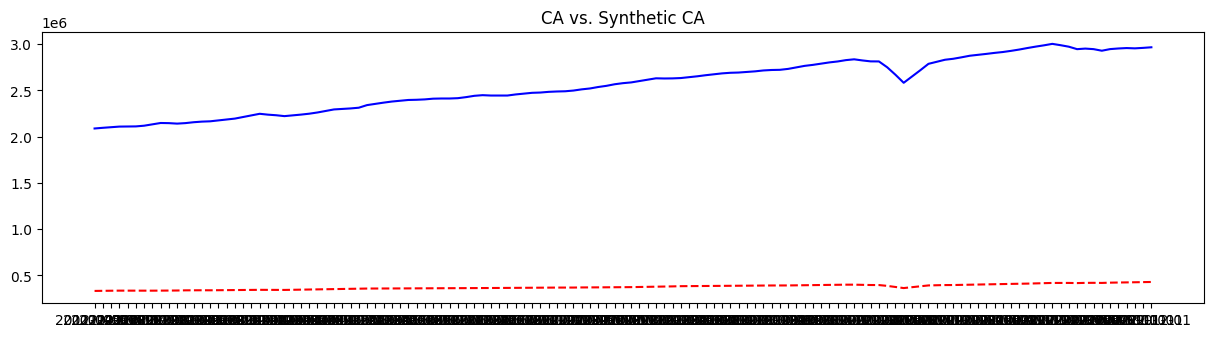

In [17]:
sc.plot(
    ["original", "pointwise", "cumulative"],
    treated_label="CA",
    synth_label="Synthetic CA",
    treatment_label="Pandemic Response",
)

## Full SCM Example
